In [88]:
#importando as bibliotecas que serão utilizadas neste notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('/content/Morning_Routine_Productivity_Dataset (2).csv')
df.head()

,Date,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Mood,Notes
0,2023-02-01 10:21:52.870632,5:30 AM,6.6,20,60,Protein-rich,Yes,6:30 AM,6,Neutral,Collection whole decision middle.
1,2023-02-02 10:21:52.870632,8:15 AM,8.0,5,50,Heavy,No,11:15 AM,7,Happy,Tree player behavior various up such attention...
2,2023-02-03 10:21:52.870632,8:30 AM,8.9,25,30,Carb-rich,Yes,10:30 AM,10,Happy,If hard focus nor trip forward change per.
3,2023-02-04 10:21:52.870632,5:00 AM,8.4,25,30,Skipped,Yes,7:00 AM,7,Happy,Physical threat federal with thing.
4,2023-02-05 10:21:52.870632,5:15 AM,8.2,25,30,Heavy,No,6:15 AM,10,Happy,Ground class Mr future.


In [90]:
import pandas as pd

# Lendo o CSV
df = pd.read_csv('/content/Morning_Routine_Productivity_Dataset (2).csv')

# Traduzindo os nomes das colunas
df.columns = [
    "Data",
    "Hora de Acordar",
    "Duração do Sono (h)",
    "Meditação (min)",
    "Exercício (min)",
    "Tipo de Café da Manhã",
    "Diário (S/N)",
    "Hora de Início do Trabalho",
    "Pontuação de Produtividade (1-10)",
    "Humor",
    "Notas"
]

# Mostrando as primeiras linhas
print(df.head())


                         Data Hora de Acordar  Duração do Sono (h)  \
0  2023-02-01 10:21:52.870632         5:30 AM                  6.6   
1  2023-02-02 10:21:52.870632         8:15 AM                  8.0   
2  2023-02-03 10:21:52.870632         8:30 AM                  8.9   
3  2023-02-04 10:21:52.870632         5:00 AM                  8.4   
4  2023-02-05 10:21:52.870632         5:15 AM                  8.2   

   Meditação (min)  Exercício (min) Tipo de Café da Manhã Diário (S/N)  \
0               20               60          Protein-rich          Yes   
1                5               50                 Heavy           No   
2               25               30             Carb-rich          Yes   
3               25               30               Skipped          Yes   
4               25               30                 Heavy           No   

  Hora de Início do Trabalho  Pontuação de Produtividade (1-10)    Humor  \
0                    6:30 AM                              

In [91]:
df.head()

,Data,Hora de Acordar,Duração do Sono (h),Meditação (min),Exercício (min),Tipo de Café da Manhã,Diário (S/N),Hora de Início do Trabalho,Pontuação de Produtividade (1-10),Humor,Notas
0,2023-02-01 10:21:52.870632,5:30 AM,6.6,20,60,Protein-rich,Yes,6:30 AM,6,Neutral,Collection whole decision middle.
1,2023-02-02 10:21:52.870632,8:15 AM,8.0,5,50,Heavy,No,11:15 AM,7,Happy,Tree player behavior various up such attention...
2,2023-02-03 10:21:52.870632,8:30 AM,8.9,25,30,Carb-rich,Yes,10:30 AM,10,Happy,If hard focus nor trip forward change per.
3,2023-02-04 10:21:52.870632,5:00 AM,8.4,25,30,Skipped,Yes,7:00 AM,7,Happy,Physical threat federal with thing.
4,2023-02-05 10:21:52.870632,5:15 AM,8.2,25,30,Heavy,No,6:15 AM,10,Happy,Ground class Mr future.


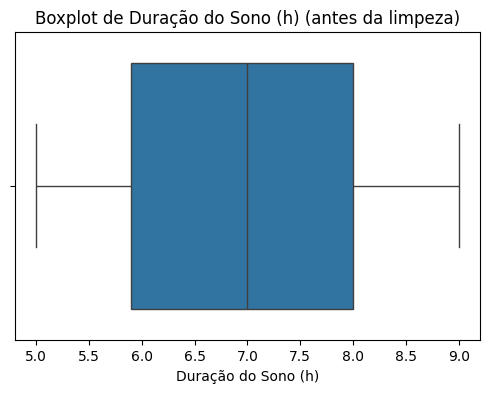

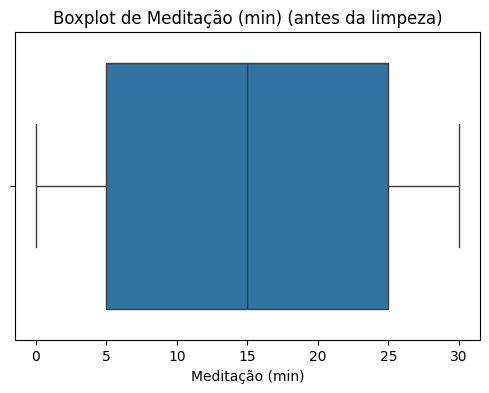

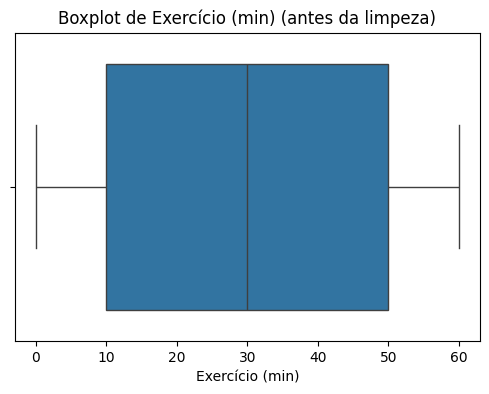

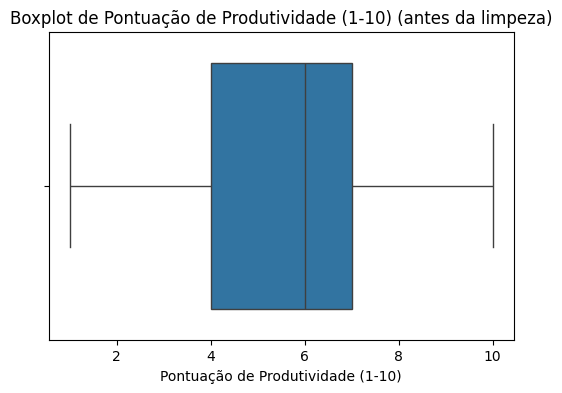

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col} (antes da limpeza)")
    plt.show()

# 3. Remover outliers (IQR)

In [93]:

df_limpo = df.copy()
numericas = ["Duração do Sono (h)", "Meditação (min)", "Exercício (min)", "Pontuação de Produtividade (1-10)"]

for col in numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_limpo = df_limpo[(df_limpo[col] >= limite_inferior) & (df_limpo[col] <= limite_superior)]

print("Tamanho original:", len(df))
print("Após remover outliers:", len(df_limpo))

# 4. Agora todos os gráficos/análises devem usar df_limpo


Tamanho original: 900
Após remover outliers: 900


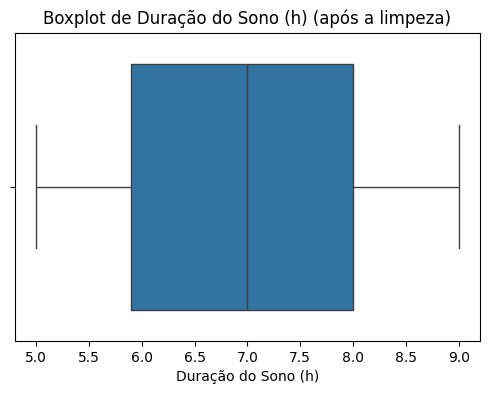

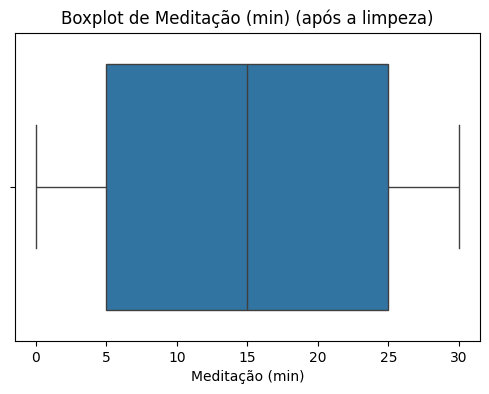

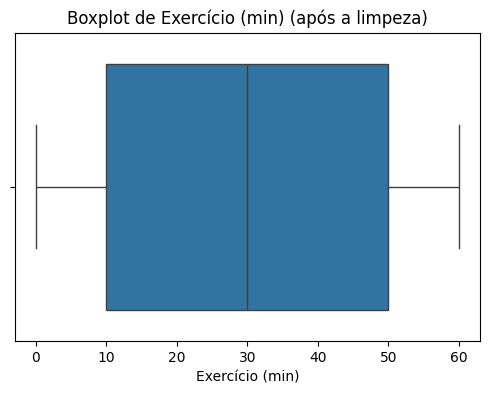

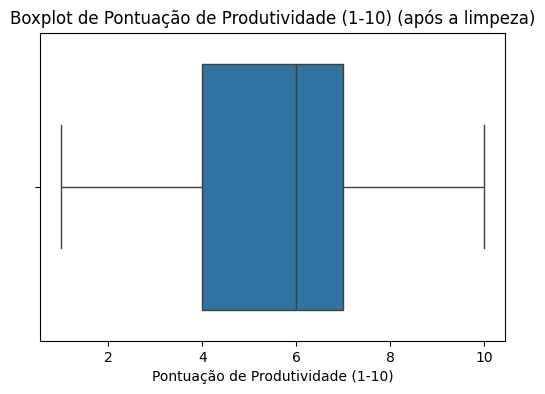

In [94]:
for col in numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_limpo[col])
    plt.title(f"Boxplot de {col} (após a limpeza)")
    plt.show()

In [95]:
print("Estatísticas Descritivas - Variáveis Numéricas\n")
estatisticas_numericas = df_limpo[[
    "Duração do Sono (h)",
    "Meditação (min)",
    "Exercício (min)",
    "Pontuação de Produtividade (1-10)"
]].describe().T

Estatísticas Descritivas - Variáveis Numéricas



In [112]:
estatisticas_numericas["mediana"] = df_limpo[[
    "Duração do Sono (h)",
    "Meditação (min)",
    "Exercício (min)",
    "Pontuação de Produtividade (1-10)"
]].median()

print(estatisticas_numericas)

                                   count       mean        std  min   25%  \
Duração do Sono (h)                900.0   6.978444   1.149872  5.0   5.9   
Meditação (min)                    900.0  14.711111   9.937227  0.0   5.0   
Exercício (min)                    900.0  29.733333  20.622568  0.0  10.0   
Pontuação de Produtividade (1-10)  900.0   5.811111   2.157814  1.0   4.0   

                                    50%   75%   max  mediana  
Duração do Sono (h)                 7.0   8.0   9.0      7.0  
Meditação (min)                    15.0  25.0  30.0     15.0  
Exercício (min)                    30.0  50.0  60.0     30.0  
Pontuação de Produtividade (1-10)   6.0   7.0  10.0      6.0  


Interpretação: Duração do sono: Média: 6,97h; Mediana: 7h; Mínimo: 5h; Máximo: 9h; Desvio padrão: 1,15. A maior parte das pessoas dorme entre 6 e 8 horas. A média e a mediana são bem próximas → distribuição equilibrada. Poucas pessoas dormem menos de 6h ou mais de 9h → quase não há extremos.

In [97]:
print("\n Frequências - Variáveis Categóricas\n")

for col in ["Tipo de Café da Manhã", "Diário (S/N)", "Humor"]:
    print(f"\n{col}:\n")
    print(df_limpo[col].value_counts())
    print("-" * 40)


 Frequências - Variáveis Categóricas


Tipo de Café da Manhã:

Tipo de Café da Manhã
Heavy           197
Carb-rich       189
Protein-rich    173
Light           172
Skipped         169
Name: count, dtype: int64
----------------------------------------

Diário (S/N):

Diário (S/N)
No     460
Yes    440
Name: count, dtype: int64
----------------------------------------

Humor:

Humor
Sad        315
Happy      313
Neutral    272
Name: count, dtype: int64
----------------------------------------


Interpretação: Tipo de café da manhã:

*   Heavy (197) foi o mais comum.
*   Carb-rich (189) e Protein-rich (173) também são escolhas frequentes.
*   Light (172) aparece em proporção semelhante.
*   Skipped (169) (pular o café da manhã) também é bem representativo.

Humor:

Happy (313) é a categoria mais frequente.

*   Happy (313) é a categoria mais frequente.
*   Sad (315) também aparece bastante, quase igual ao “Happy”.
*   Neutral (272) é um pouco menor, mas ainda relevante.

Não vamos utilizar a categoria "diary".

produtividade vs sono

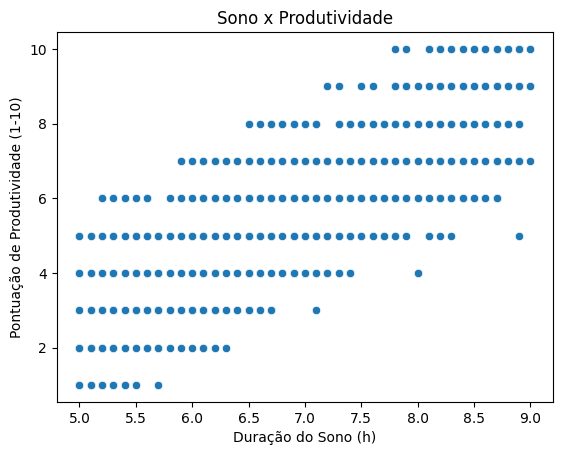

In [98]:
sns.scatterplot(data=df_limpo, x="Duração do Sono (h)", y="Pontuação de Produtividade (1-10)")
plt.title("Sono x Produtividade")
plt.show()

Interpretação:

*   Quem dorme menos (≈5 a 6 horas) tende a ter notas de produtividade mais baixas (1 a 6).
*   À medida que o sono aumenta (7 a 9 horas), aparecem mais casos de produtividade alta (8 a 10)
*   A nuvem de pontos mostra que não é uma relação perfeita (tem gente que dorme 8h e ainda tem produtividade 4, por exemplo), mas o padrão geral é positivo.
*   Existe uma correlação positiva: mais horas de sono estão associadas a maior produtividade.
*   O gráfico sugere que a faixa ideal de sono, nesse dataset, é 7 a 9 horas.
*   Pessoas com pouco sono (<6h) raramente alcançam produtividade máxima.


produtividade vs meditação

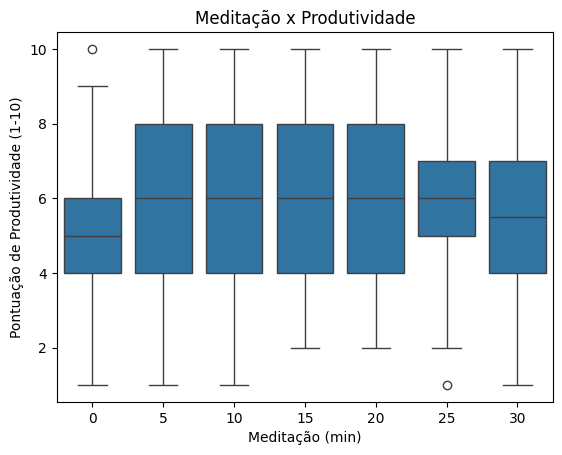

In [99]:
sns.boxplot(data=df, x="Meditação (min)", y="Pontuação de Produtividade (1-10)")
plt.title("Meditação x Produtividade")
plt.show()

Interpretação:

*   Cada caixa representa a distribuição da produtividade dentro de um grupo de meditação (0, 5, 10, 15, 20, 25, 30 min).
*   A linha no meio da caixa é a mediana da produtividade daquele grupo.
*   O tamanho da caixa mostra a dispersão (do 1º ao 3º quartil).
*   As bolinhas fora das “antenas” são outliers específicos daquele grupo.


*   Mediana da Produtividade:
Fica sempre entre 5 e 7, independente do tempo de meditação. Isso sugere que a meditação, isoladamente, não altera fortemente a produtividade.

*   Dispersão:
Em quase todos os grupos, a produtividade varia bastante (tem gente com 2 e gente com 9–10). Isso reforça que outros fatores (sono, humor, exercício) podem estar pesando mais.

*   Oultiers:
- Meditação 0 min → aparece um ponto em produtividade 10 → alguém que não meditou mas foi super produtivo, fora do padrão do grupo.
- Meditação 25 min → aparece um ponto em produtividade 1 → alguém que meditou bastante mas teve produtividade baixíssima. Esses outliers mostram casos individuais extremos, mas não mudam o padrão geral.Os outliers de grupos são interessantes: revelam exceções (casos de pessoas que desafiam a tendência do grupo).

A meditação não mostra efeito consistente direto na produtividade nesse dataset.




/tmp/ipython-input-230548710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x="Humor", y="Pontuação de Produtividade (1-10)", palette="Set2")


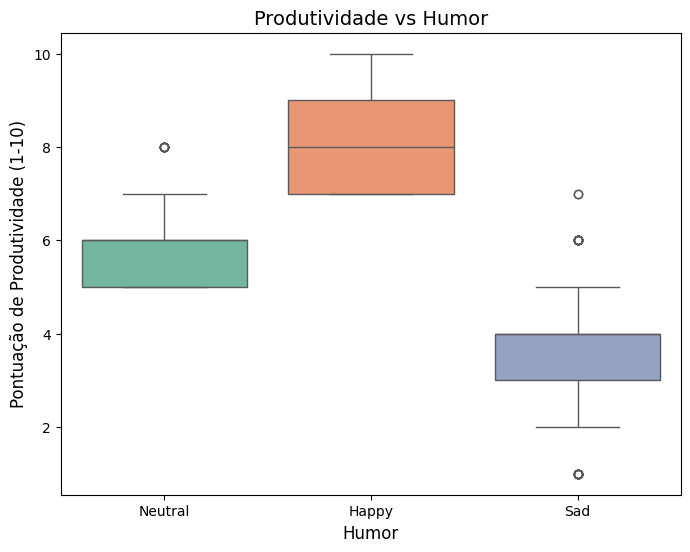

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(data=df_limpo, x="Humor", y="Pontuação de Produtividade (1-10)", palette="Set2")

plt.title("Produtividade vs Humor", fontsize=14)
plt.xlabel("Humor", fontsize=12)
plt.ylabel("Pontuação de Produtividade (1-10)", fontsize=12)
plt.show()


Interpretação:

*   Happy: Mediana em torno de 8; Distribuição concentrada entre 7 e 9; Grupo mais produtivo.
*   Neutral: Mediana próxima de 6; Produtividade moderada; Intervalo menor (menos variação que o grupo “Sad”).
*   Sad: Mediana por volta de 3–4; Produtividade bem mais baixa. Maior dispersão: alguns poucos conseguem 6–7, mas a maioria fica em baixo nível.

Sobre os outliers específicos de grupos:
- Neutral → aparece um ponto em produtividade 8, indicando alguém que mesmo estando “neutro” foi muito produtivo.
 - Sad → aparecem pontos isolados em produtividade 6–7, casos de pessoas tristes que, mesmo assim, mantiveram produtividade alta (fora do padrão do grupo).

Esses outliers mostram exceções, mas não mudam a tendência clara: quem está triste produz menos.

Existe uma relação muito forte entre Humor e Produtividade:
*   Feliz → mais produtivo
*   Neutro → mediano
*   Triste → menos produtivo

O estado emocional é quase tão importante quanto o sono para explicar produtividade nesse dataset.

Os outliers mostram que há exceções: algumas pessoas conseguem manter alto desempenho mesmo estando tristes ou neutras, mas são poucos casos.



Meditação afeta a produtividade se você dormir menos de 6 horas?

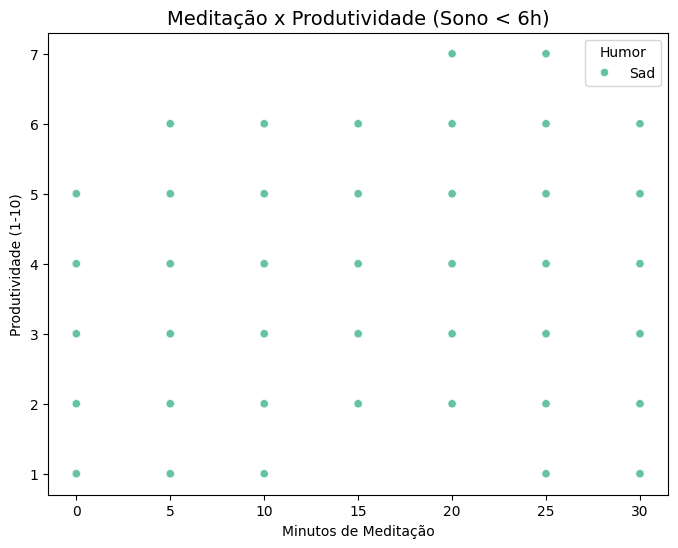

Correlação Meditação x Produtividade (Sono < 6h):
                                   Meditação (min)  \
Meditação (min)                           1.000000   
Pontuação de Produtividade (1-10)         0.131063   

                                   Pontuação de Produtividade (1-10)  
Meditação (min)                                             0.131063  
Pontuação de Produtividade (1-10)                           1.000000  


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar quem dormiu menos de 6 horas
df_sono_baixo = df_limpo[df_limpo["Duração do Sono (h)"] < 6]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_sono_baixo, x="Meditação (min)", y="Pontuação de Produtividade (1-10)", hue="Humor", palette="Set2")
plt.title("Meditação x Produtividade (Sono < 6h)", fontsize=14)
plt.xlabel("Minutos de Meditação")
plt.ylabel("Produtividade (1-10)")
plt.show()

# Correlação dentro do grupo
print("Correlação Meditação x Produtividade (Sono < 6h):")
print(df_sono_baixo[["Meditação (min)", "Pontuação de Produtividade (1-10)"]].corr())


Interpretação:

*   A produtividade varia bastante (1 a 7) em todos os níveis de meditação.
*   Não há um padrão claro de que mais minutos de meditação aumentam a produtividade.
*   0,13 → correlação muito fraca, praticamente inexistente. Isso significa que, nesse conjunto de dados, meditar mais não compensa a falta de sono em termos de produtividade.
*   Com o filtro de quem dormiu <6h, a maioria ou todos os registros caíram no humor “Sad”. Isso reforça que a falta de sono está mais ligada ao humor

*   Pessoas com sono insuficiente (<6h) não conseguem aumentar significativamente a produtividade apenas com meditação.
*   Meditar ajuda no bem-estar, mas não substitui o impacto do sono na produtividade.

## Exercícios > 30 min melhoram o humor?

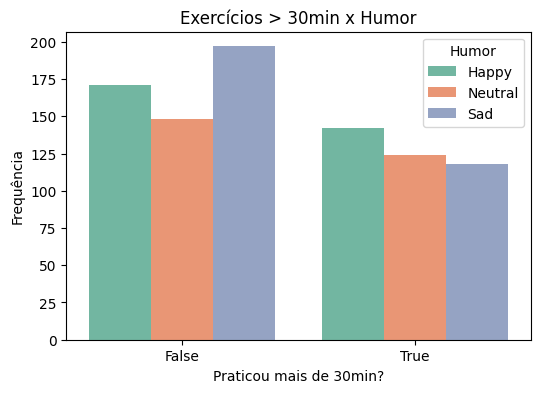


Distribuição de Humor por exercício >30min:
Humor                 Happy   Neutral       Sad
Exercício > 30min                              
False              0.331395  0.286822  0.381783
True               0.369792  0.322917  0.307292


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a coluna no df_limpo
df_limpo["Exercício > 30min"] = df_limpo["Exercício (min)"] > 30

plt.figure(figsize=(6,4))
sns.countplot(data=df_limpo, x="Exercício > 30min", hue="Humor", palette="Set2")
plt.title("Exercícios > 30min x Humor")
plt.xlabel("Praticou mais de 30min?")
plt.ylabel("Frequência")
plt.show()

print("\nDistribuição de Humor por exercício >30min:")
print(pd.crosstab(df_limpo["Exercício > 30min"], df_limpo["Humor"], normalize="index"))


Interpretação:

*   Quem NÃO pratica mais de 30 min (False):
Frequências mais altas de Sad (Triste) e Neutral.
Proporção de “Happy” é menor (≈ 33%).


*   Quem pratica MAIS de 30 min (True):
Aumenta a proporção de Happy (≈ 37%).
Também cresce um pouco a proporção de Neutral (≈ 32%).
A proporção de Sad cai (≈ 30%).


*   Sem exercício >30 min:
Happy → 33%; Neutral → 28%; Sad → 38%

*   Com exercício >30 min:
Happy → 37% (+4 pontos percentuais); Neutral → 32% (+4 pp); Sad → 30% (–8 pp)

Isso significa que praticar mais de 30 minutos de exercício aumenta a chance de estar feliz e reduz a chance de estar triste.



Horário de despertar ideal para maior produtividade

# Converter Hora de Acordar para formato numérico (minutos desde meia-noite)

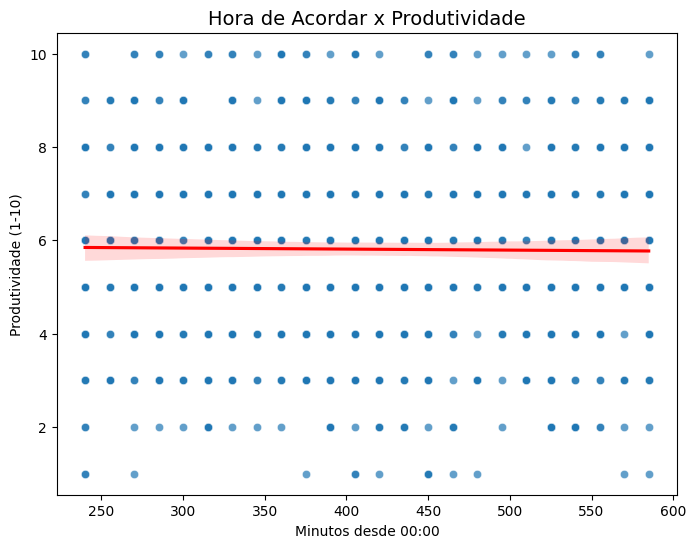

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Converter "Hora de Acordar" (pode vir como '5:30 AM' ou '06:15')
h1 = pd.to_datetime(df_limpo["Hora de Acordar"].astype(str).str.strip(),
                    format="%I:%M %p", errors="coerce")   # tenta AM/PM
h2 = pd.to_datetime(df_limpo["Hora de Acordar"].astype(str).str.strip(),
                    format="%H:%M", errors="coerce")      # fallback 24h

hora_conv = h1.fillna(h2)  # usa o que deu certo

# 2) Criar coluna numérica (minutos desde 00:00)
df_limpo["Hora de Acordar Num"] = hora_conv.dt.hour*60 + hora_conv.dt.minute

# 3) Remover linhas que não converteram (se houver)
df_plot = df_limpo.dropna(subset=["Hora de Acordar Num", "Pontuação de Produtividade (1-10)"])

# 4) Plotar (USANDO df_limpo/df_plot, NÃO df)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot,
                x="Hora de Acordar Num",
                y="Pontuação de Produtividade (1-10)",
                alpha=0.7)
sns.regplot(data=df_plot,
            x="Hora de Acordar Num",
            y="Pontuação de Produtividade (1-10)",
            scatter=False, color="red")
plt.title("Hora de Acordar x Produtividade", fontsize=14)
plt.xlabel("Minutos desde 00:00")
plt.ylabel("Produtividade (1-10)")
plt.show()


Interpretação:


*   Distribuição dos pontos: A maior parte acorda entre 300 e 540 minutos (≈ 5h às 9h da manhã).  A produtividade se espalha em toda a faixa (1 a 10), sem uma concentração clara em um único horário.

*   Linha de tendência (regressão): A linha vermelha está praticamente horizontal e levemente negativa. Isso indica que não há relação forte entre acordar mais cedo ou mais tarde e a produtividade. Ou seja, acordar às 5h ou às 8h parece não mudar muito os níveis de produtividade médios no dataset.

A hora de acordar, isoladamente, não é determinante da produtividade; Diferente do sono total, que mostrou forte impacto, o horário de despertar não altera significativamente os resultados; Isso pode indicar que o mais importante não é a hora que acorda, mas sim quantas horas de sono de qualidade a pessoa teve.

In [104]:
#Correlação entre sono, exercício, meditação e produtividade

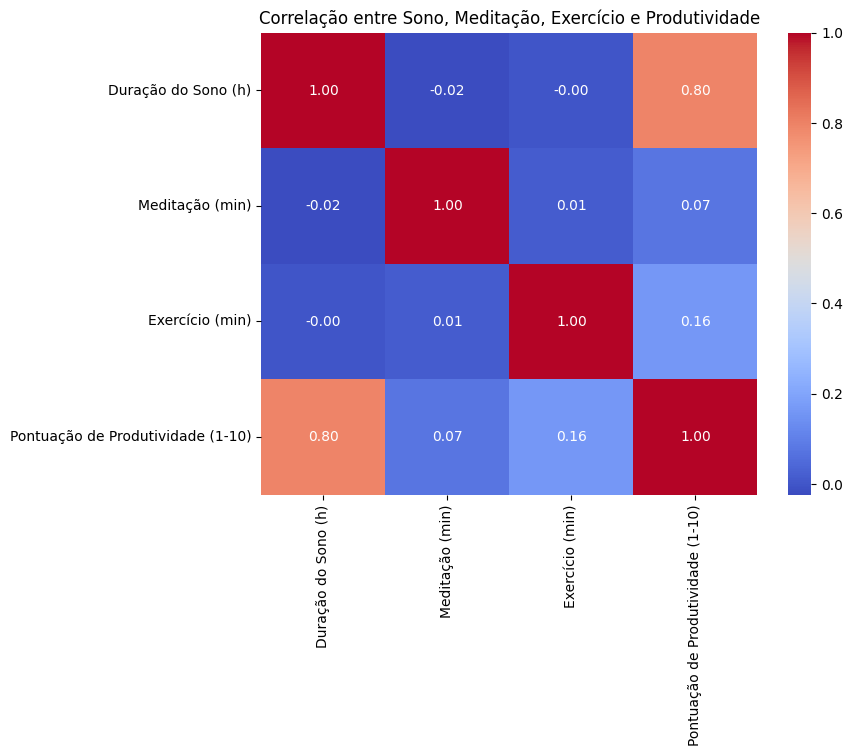

In [105]:
import seaborn as sns

corr = df_limpo[["Duração do Sono (h)", "Meditação (min)", "Exercício (min)", "Pontuação de Produtividade (1-10)"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Sono, Meditação, Exercício e Produtividade")
plt.show()


Interpretação:

+1 → correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).

–1 → correlação negativa perfeita (quando uma sobe, a outra desce).

0 → sem relação linear.

*   Sono x Produtividade → 0,80: Correlação forte e positiva; Quanto mais horas de sono, maior a produtividade. Esse é o fator mais importante do dataset.
*   Exercício x Produtividade → 0,16: Correlação fraca, mas positiva; Indica que fazer exercício pode contribuir um pouco para a produtividade, mas o impacto é pequeno comparado ao sono.
*   Meditação x Produtividade → 0,07: Correlação muito fraca (quase irrelevante); Sozinha, a meditação não mostra efeito significativo na produtividade.
*   Sono x Meditação / Sono x Exercício → próximos de 0: Não há relação entre quanto a pessoa dorme e quanto ela medita ou se exercita. Ou seja, são hábitos independentes no dataset.

Sono é o fator-chave para produtividade.

Exercício ajuda um pouco, mas tem efeito bem menor.

Meditação isolada não mostra impacto direto.

produtividade vs café da manhã

/tmp/ipython-input-3070612059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x="Tipo de Café da Manhã", y="Pontuação de Produtividade (1-10)", palette="Set2")


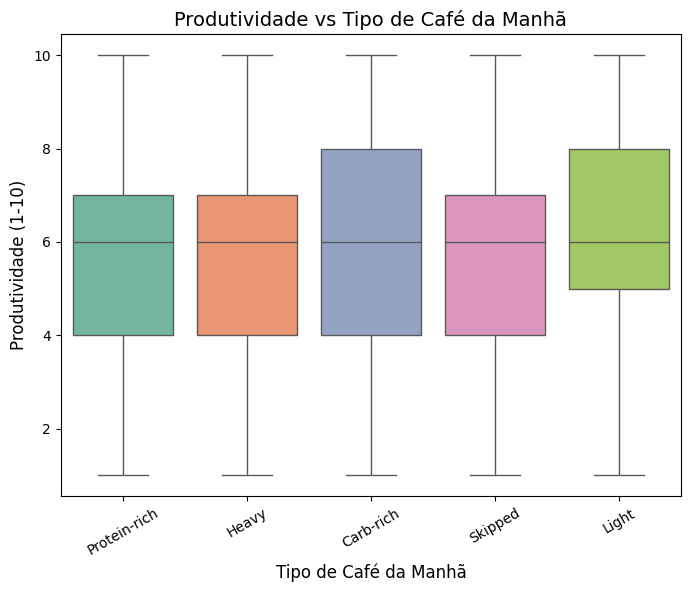


Média de Produtividade por Tipo de Café da Manhã:
Tipo de Café da Manhã
Carb-rich       5.878307
Heavy           5.857868
Light           5.965116
Protein-rich    5.716763
Skipped         5.621302
Name: Pontuação de Produtividade (1-10), dtype: float64


In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(data=df_limpo, x="Tipo de Café da Manhã", y="Pontuação de Produtividade (1-10)", palette="Set2")

plt.title("Produtividade vs Tipo de Café da Manhã", fontsize=14)
plt.xlabel("Tipo de Café da Manhã", fontsize=12)
plt.ylabel("Produtividade (1-10)", fontsize=12)
plt.xticks(rotation=30)
plt.show()

# Também calcular a média de produtividade por tipo de café da manhã
print("\nMédia de Produtividade por Tipo de Café da Manhã:")
print(df.groupby("Tipo de Café da Manhã")["Pontuação de Produtividade (1-10)"].mean())


Interpretação:

média da produtividade:
- Carb-rich (rico em carboidratos): 5,87
- Heavy (pesado): 5,88
- Light (leve): 5,97
- Protein-rich (rico em proteínas): 5,72
- Skipped (pulado): 5,62

As diferenças são pequenas (todas entre 5,6 e 6,0).
Nenhum tipo de café da manhã se destaca fortemente como “o melhor” para produtividade.


como estão os dados?

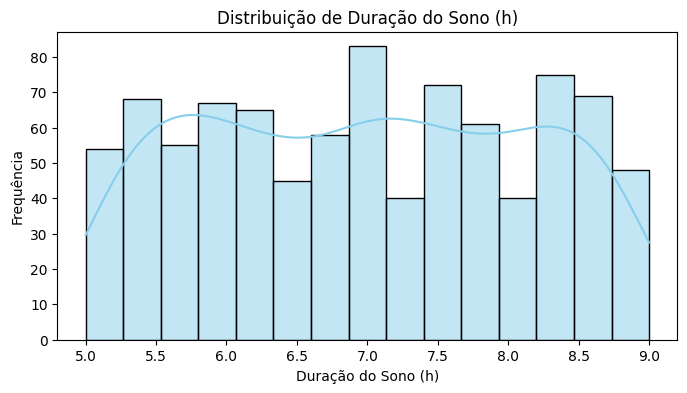

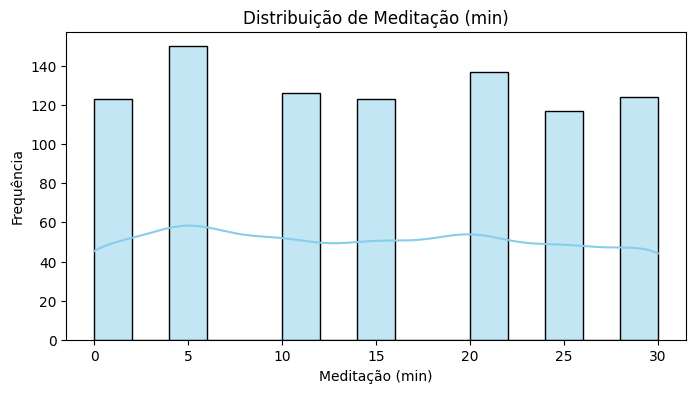

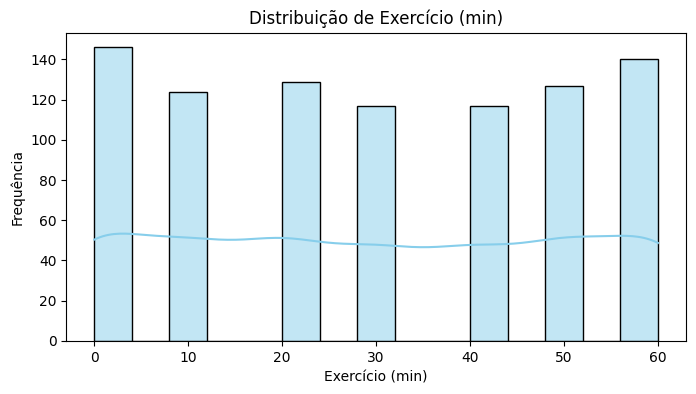

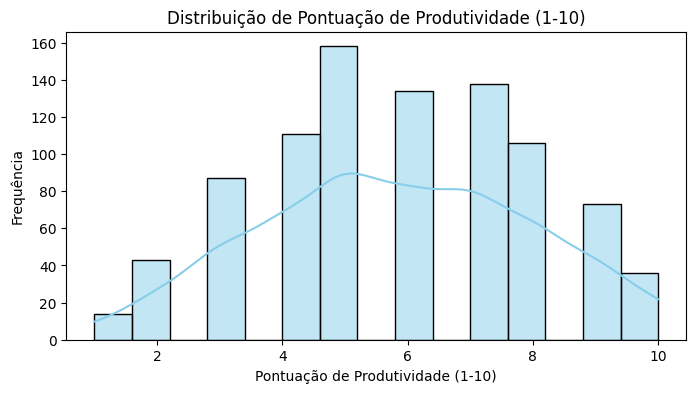

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis_numericas = ["Duração do Sono (h)", "Meditação (min)", "Exercício (min)", "Pontuação de Produtividade (1-10)"]

for col in variaveis_numericas:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=15, color="skyblue")
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()


## 3. frequência de categorias

/tmp/ipython-input-1677996966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


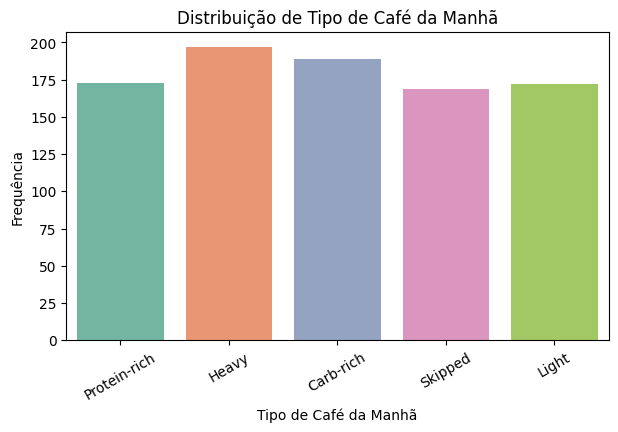

/tmp/ipython-input-1677996966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


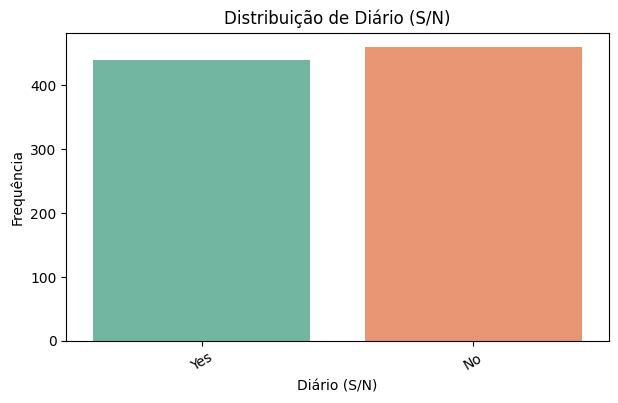

/tmp/ipython-input-1677996966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


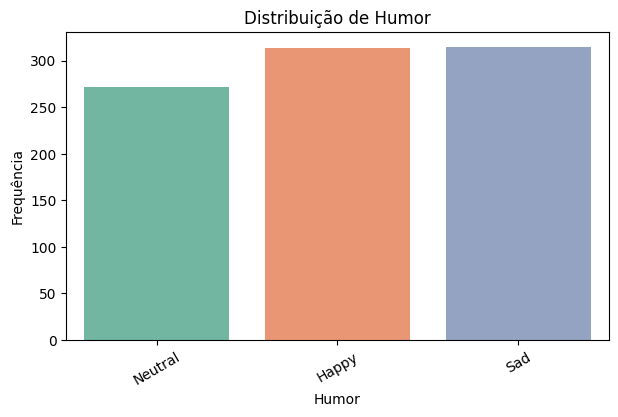

In [108]:
categoricas = ["Tipo de Café da Manhã", "Diário (S/N)", "Humor"]

for col in categoricas:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.xticks(rotation=30)
    plt.show()


Relação entre variáveis numéricas

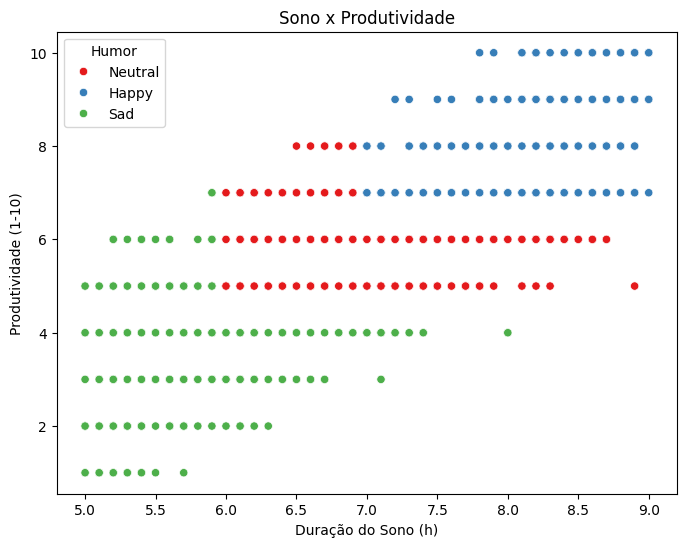

In [109]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_limpo, x="Duração do Sono (h)", y="Pontuação de Produtividade (1-10)", hue="Humor", palette="Set1")
plt.title("Sono x Produtividade")
plt.xlabel("Duração do Sono (h)")
plt.ylabel("Produtividade (1-10)")
plt.show()


Interpretação:

Quanto mais horas de sono, maior a produtividade e melhor o humor.

O gráfico reforça que sono adequado (7–9h) é o principal fator para ter tanto alto desempenho quanto estado emocional positivo.

O humor funciona como mediador: menos sono → mais tristeza → menos produtividade.


- Sono curto (5–6h): Maioria dos pontos está em produtividade baixa a média (1–6); Predomínio de humor triste (verde); Indica que pouco sono está fortemente associado a baixo rendimento e pior humor.

- Sono moderado (6,5–7,5h): A produtividade começa a subir (faixa 5–8); Maior presença de humor neutro (vermelho). Aqui parece uma “zona intermediária”: nem tão ruim, mas ainda não ótima.

- Sono longo (8–9h): Maior concentração de produtividade alta (8–10). Predomínio de humor feliz (azul). Mostra que o impacto positivo do sono se reflete não só no rendimento, mas também no bem-estar emocional.